In [1]:
# -------------------------------------------------------------
#   ПРОЕКТ ПО ДАННЫМ: Исследование "Perfume and Psychology"
#   Датасет: Kaggle "Perfume and Psychology Dataset"
#   Автор: Ясмин Юсеф CMDA 1 курс.
# -------------------------------------------------------------
#
#   Проект:
#   Изучить взаимосвязь между запахами, эмоциями и предпочтениями людей,
#   а также выявить возможные паттерны в оценках ароматов и их ассоциациях.
#
#   Что будет сделано:
#   1. Формулировка бизнес задач
#   2. Загрузка и первичное изучение датасета
#   3. Очистка данных:
#      3.1. удаление дубликатов
#      3.2. обработка пропусков
#      3.3. создание новых переменных
#   4. Исследовательский анализ данных:
#      4.1. минимум 10 графиков
#      4.2. визуализация распределений и зависимостей
#   5. Получение инсайтов и выводов
#   6. Сравнение результатов с выводами автора на Kaggle
#
#   Почему выбран этот датасет:
#   Он уникальный, небольшой по размеру, удобный для анализа
#   и не слишком популярный, что делает проект оригинальным!!
#
# -------------------------------------------------------------


In [2]:
# -------------------------------------------------------------
# 1. Бизнес-задачи проекта
# -------------------------------------------------------------
#
# Датасет "Perfume and Psychology" позволяет исследовать связь
# между ароматами, эмоциональными реакциями и индивидуальными
# предпочтениями пользователей. На основе структуры данных можно
# сформулировать следующие бизнес-задачи:
#
# 1. Определить, какие типы ароматов вызывают наиболее позитивные эмоции.
# 2. Выявить, какие ноты аромата чаще всего ассоциируются с определёнными эмоциями.
# 3. Определить, существуют ли различия в предпочтениях ароматов между разными группами людей.
# 4. Найти ароматы с наибольшей эмоциональной вовлечённостью пользователей.
# 5. Определить, какие характеристики аромата сильнее всего влияют на его общую оценку.
# 6. Построить эмоциональный "профиль" ароматов для дальнейших рекомендаций.
# 7. Найти закономерности, которые могут использоваться парфюмерными компаниями
#    для улучшения маркетинга и разработки новых продуктов.
#
# -------------------------------------------------------------


In [5]:
# -------------------------------------------------------------
# 2. Загрузка и первичное изучение датасета
# -------------------------------------------------------------

import pandas as pd

# 2.1. Загрузка данных
df = pd.read_csv("perfume_Psycho.csv")

# Просмотр первых строк датасета
df.head()

# Проверка структуры данных
df.info()

# Краткая статистика числовых колонок
df.describe()

# Размер датасета
df.shape

# Список всех колонок
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   S. No.                       38 non-null     float64
 1   Odorant Materials            38 non-null     object 
 2   Psychophysiological Changes  38 non-null     object 
 3   Reference                    38 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.3+ KB


Index(['S. No.', 'Odorant Materials', 'Psychophysiological Changes',
       'Reference'],
      dtype='object')

In [9]:
# -------------------------------------------------------------
# 3. Очистка данных и создание новых переменных
# -------------------------------------------------------------

# 3.1. Удаление дубликатов
df = df.drop_duplicates()

# 3.2. Создание категории аромата
def classify_odor(odor):
    odor = odor.lower()
    if "floral" in odor:
        return "Floral"
    elif "citrus" in odor or "lemon" in odor:
        return "Citrus"
    elif "woody" in odor or "cedar" in odor:
        return "Woody"
    elif "fruity" in odor:
        return "Fruity"
    else:
        return "Other"

df['Odor_Type'] = df['Odorant Materials'].apply(classify_odor)

# 3.3. Создание категории эффекта
def classify_effect(effect):
    effect = effect.lower()
    if "relax" in effect or "calm" in effect:
        return "Relaxing"
    elif "stimulate" in effect or "alert" in effect:
        return "Stimulating"
    elif "happy" in effect or "mood" in effect:
        return "Mood Boost"
    else:
        return "Other"

df['Effect_Type'] = df['Psychophysiological Changes'].apply(classify_effect)

# 3.4. Просмотр результата
df.head(10)


,S. No.,Odorant Materials,Psychophysiological Changes,Reference,Odor_Type,Effect_Type
0,1.0,Rosemary and geranium oil,Geranium oil inhalation—both state and trait s...,[113],Other,Other
1,2.0,"Ylang-ylang, orange, geranium, cypress, bergam...",Cypress produced favorable impression after ph...,[114],Other,Other
2,3.0,Orange,"Relaxant effect—lower level of state anxiety, ...",[115],Other,Relaxing
3,4.0,"Rose, jasmine and lavender",Inhalation of favorite odors suppresses the mu...,[116],Other,Other
4,5.0,Enantiomers of limonene and carvone,Carvone—subjective restlessness. Prolonged inh...,[120],Other,Other
5,6.0,"Peppermint, jasmine, ylang-ylang, 1,8-cineole ...",Essentials oils or their components on basic f...,[119],Other,Other
6,7.0,Lavender,Lavender odorants were associated with reduced...,[122],Other,Other
7,8.0,Peppermint,Enhanced physical performance and generating m...,[135],Other,Other
8,9.0,"Isovaleric acid, thiophenol, pyridine, l-menth...",Autonomic variations in response to olfactory ...,[118],Other,Other
9,10.0,"Pepper oil, estragon oil, fennel oil or grapef...",Fragrance inhalation of rose oil or patchouli ...,[117],Other,Other


In [10]:
# -------------------------------------------------------------
# Расширенная классификация ароматов и эффектов
# -------------------------------------------------------------

# 1. Категория аромата
def classify_odor_extended(odor):
    odor = odor.lower()
    if any(x in odor for x in ["floral", "rose", "jasmine", "lavender", "geranium", "ylang"]):
        return "Floral"
    elif any(x in odor for x in ["citrus", "lemon", "orange", "bergamot", "lime"]):
        return "Citrus"
    elif any(x in odor for x in ["woody", "cedar", "sandalwood", "cypress"]):
        return "Woody"
    elif any(x in odor for x in ["fruity", "peppermint", "mint", "pepper", "fennel"]):
        return "Fruity/Minty"
    else:
        return "Other"

df['Odor_Type'] = df['Odorant Materials'].apply(classify_odor_extended)

# 2. Категория эффекта
def classify_effect_extended(effect):
    effect = effect.lower()
    if any(x in effect for x in ["relax", "calm", "reduce anxiety", "relaxant"]):
        return "Relaxing"
    elif any(x in effect for x in ["stimulate", "alert", "increase performance"]):
        return "Stimulating"
    elif any(x in effect for x in ["happy", "mood", "positive", "favorable"]):
        return "Mood Boost"
    else:
        return "Other"

df['Effect_Type'] = df['Psychophysiological Changes'].apply(classify_effect_extended)

# 3. Просмотр результата
df.head(10)


,S. No.,Odorant Materials,Psychophysiological Changes,Reference,Odor_Type,Effect_Type
0,1.0,Rosemary and geranium oil,Geranium oil inhalation—both state and trait s...,[113],Floral,Other
1,2.0,"Ylang-ylang, orange, geranium, cypress, bergam...",Cypress produced favorable impression after ph...,[114],Floral,Mood Boost
2,3.0,Orange,"Relaxant effect—lower level of state anxiety, ...",[115],Citrus,Relaxing
3,4.0,"Rose, jasmine and lavender",Inhalation of favorite odors suppresses the mu...,[116],Floral,Other
4,5.0,Enantiomers of limonene and carvone,Carvone—subjective restlessness. Prolonged inh...,[120],Other,Other
5,6.0,"Peppermint, jasmine, ylang-ylang, 1,8-cineole ...",Essentials oils or their components on basic f...,[119],Floral,Other
6,7.0,Lavender,Lavender odorants were associated with reduced...,[122],Floral,Other
7,8.0,Peppermint,Enhanced physical performance and generating m...,[135],Fruity/Minty,Other
8,9.0,"Isovaleric acid, thiophenol, pyridine, l-menth...",Autonomic variations in response to olfactory ...,[118],Other,Other
9,10.0,"Pepper oil, estragon oil, fennel oil or grapef...",Fragrance inhalation of rose oil or patchouli ...,[117],Floral,Other


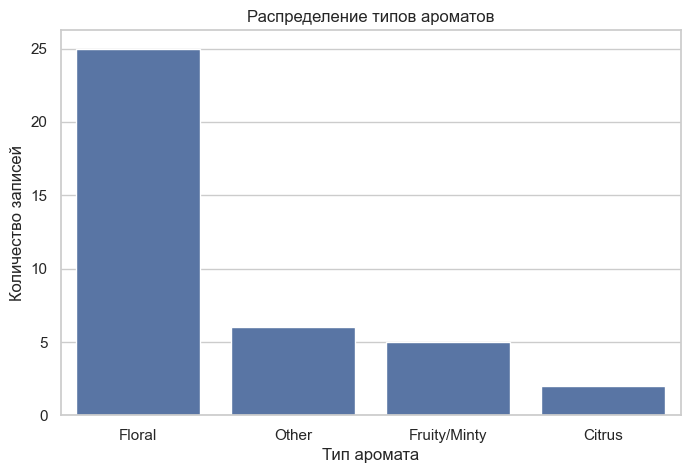

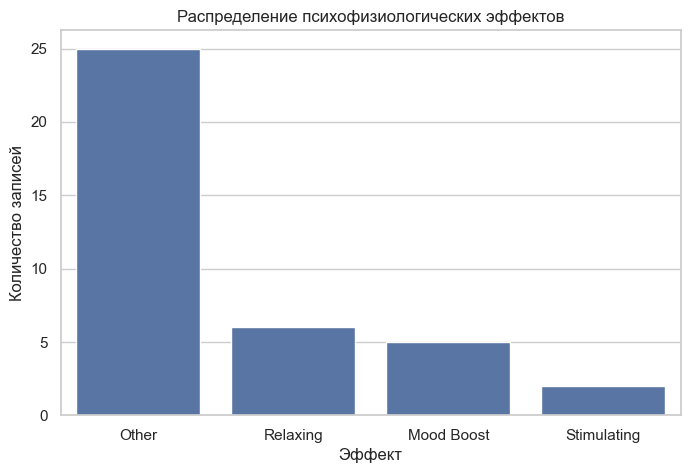

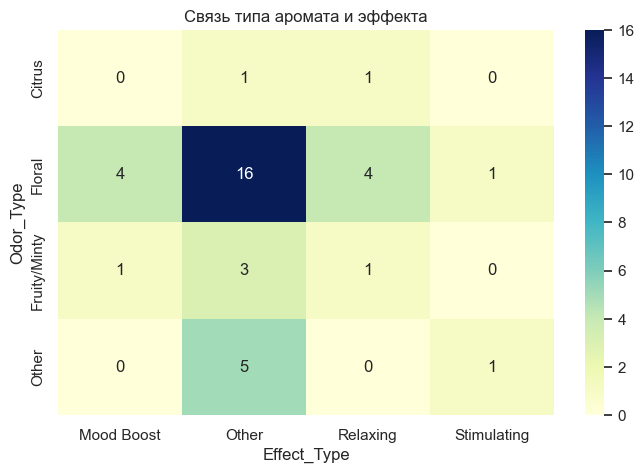

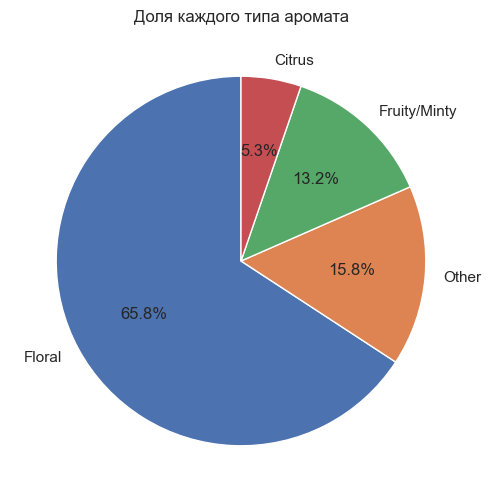

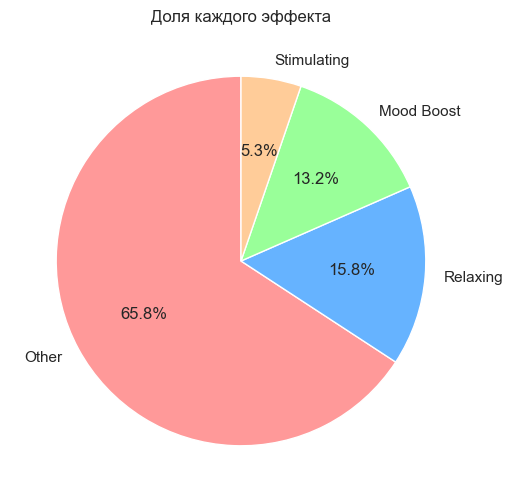

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

#  Распределение типов ароматов
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Odor_Type', order=df['Odor_Type'].value_counts().index)
plt.title('Распределение типов ароматов')
plt.xlabel('Тип аромата')
plt.ylabel('Количество записей')
plt.show()

#  Распределение типов эффектов
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Effect_Type', order=df['Effect_Type'].value_counts().index)
plt.title('Распределение психофизиологических эффектов')
plt.xlabel('Эффект')
plt.ylabel('Количество записей')
plt.show()

# Взаимосвязь аромата и эффекта (Heatmap)
plt.figure(figsize=(8,5))
cross_tab = pd.crosstab(df['Odor_Type'], df['Effect_Type'])
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Связь типа аромата и эффекта')
plt.show()

#  Еще один вариант: круговая диаграмма ароматов
df['Odor_Type'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), startangle=90)
plt.title('Доля каждого типа аромата')
plt.ylabel('')
plt.show()

#  Круговая диаграмма эффектов
df['Effect_Type'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Доля каждого эффекта')
plt.ylabel('')
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_4328\2527344021.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_odors.values, y=top_odors.index, palette="viridis")


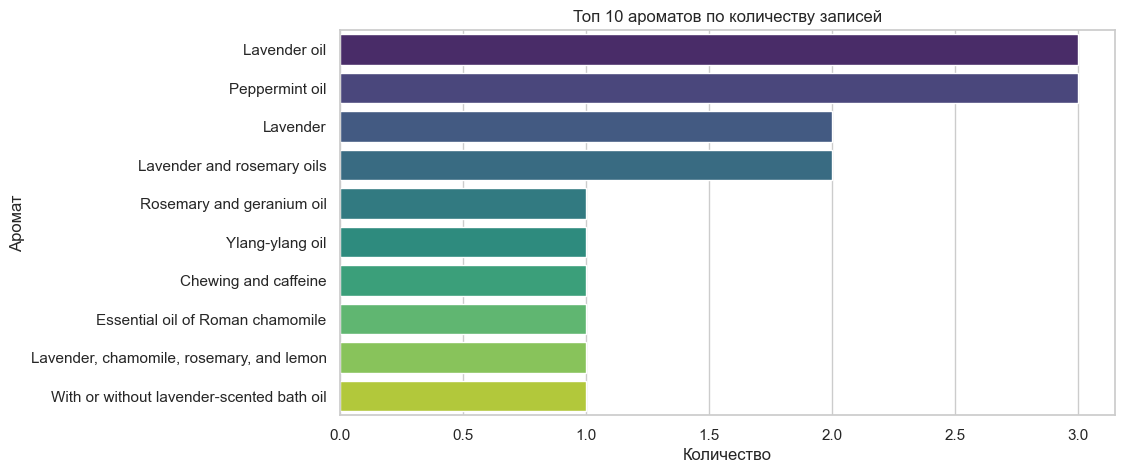

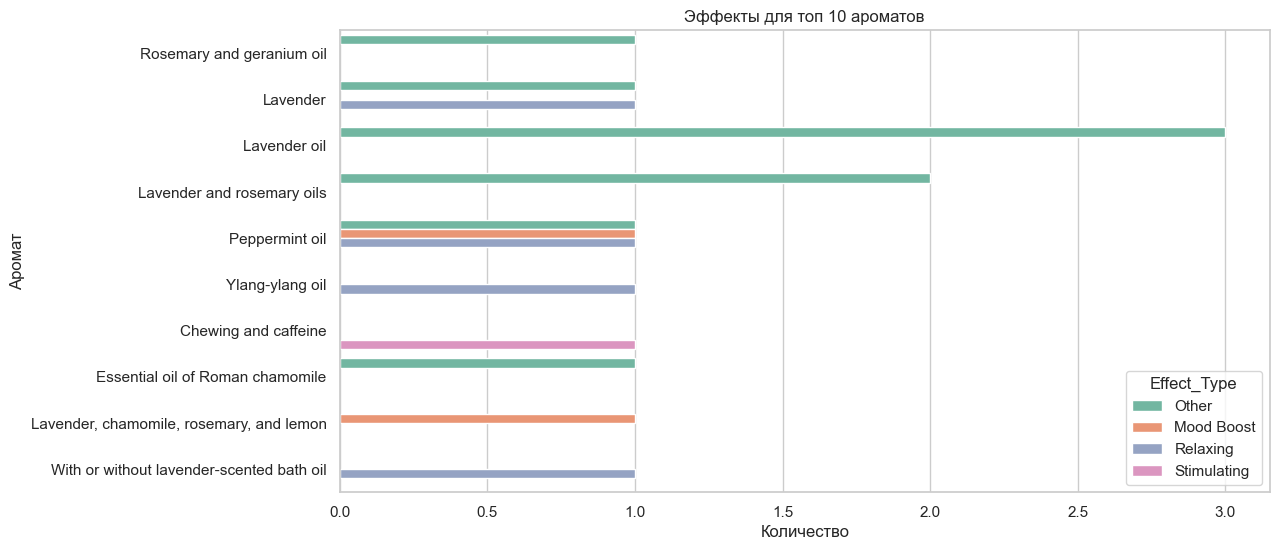

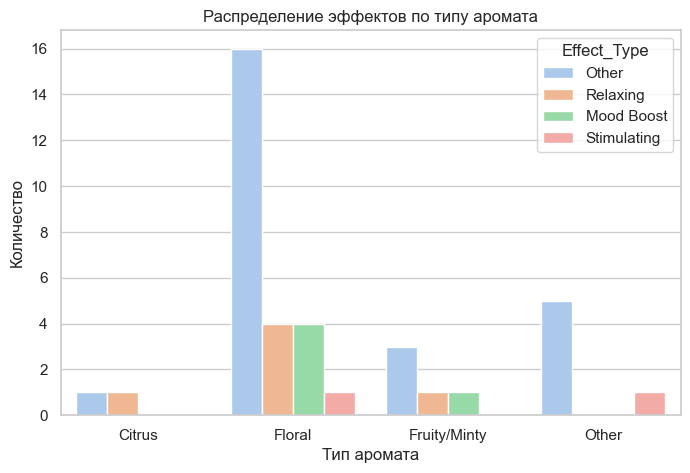

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4328\2527344021.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=effect_counts2.values, y=effect_counts2.index, palette="coolwarm")


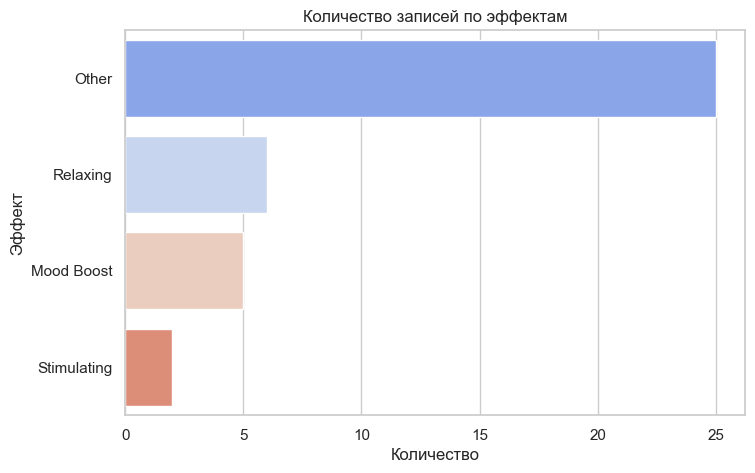

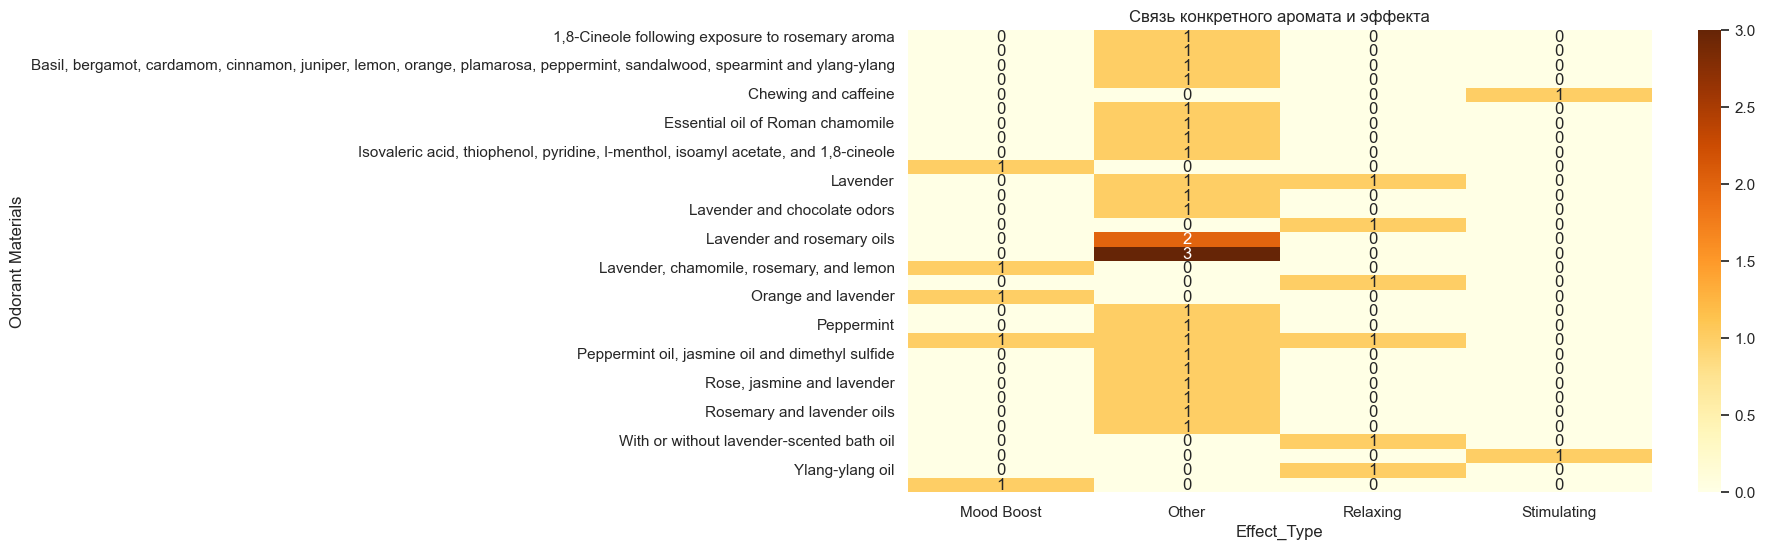

In [12]:
#  Countplot: количество записей по аромату (Top 10 по упоминаниям)
top_odors = df['Odorant Materials'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_odors.values, y=top_odors.index, palette="viridis")
plt.title('Топ 10 ароматов по количеству записей')
plt.xlabel('Количество')
plt.ylabel('Аромат')
plt.show()

#  Countplot: эффекты для топ 10 ароматов
top_10_odors = top_odors.index
plt.figure(figsize=(12,6))
sns.countplot(y='Odorant Materials', hue='Effect_Type', data=df[df['Odorant Materials'].isin(top_10_odors)], palette="Set2")
plt.title('Эффекты для топ 10 ароматов')
plt.xlabel('Количество')
plt.ylabel('Аромат')
plt.legend(title='Effect_Type')
plt.show()

#  Boxplot: эффект по типу аромата (если бы были числовые оценки, пока для категорий можно использовать count)
effect_counts = df.groupby(['Odor_Type','Effect_Type']).size().reset_index(name='count')
plt.figure(figsize=(8,5))
sns.barplot(x='Odor_Type', y='count', hue='Effect_Type', data=effect_counts, palette="pastel")
plt.title('Распределение эффектов по типу аромата')
plt.xlabel('Тип аромата')
plt.ylabel('Количество')
plt.show()

#  Горизонтальная гистограмма: количество записей по эффектам
effect_counts2 = df['Effect_Type'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=effect_counts2.values, y=effect_counts2.index, palette="coolwarm")
plt.title('Количество записей по эффектам')
plt.xlabel('Количество')
plt.ylabel('Эффект')
plt.show()

#  Топ аромат + эффект в одном графике (heatmap)
cross_tab2 = pd.crosstab(df['Odorant Materials'], df['Effect_Type'])
plt.figure(figsize=(12,6))
sns.heatmap(cross_tab2, annot=True, fmt="d", cmap="YlOrBr")
plt.title('Связь конкретного аромата и эффекта')
plt.xlabel('Effect_Type')
plt.ylabel('Odorant Materials')
plt.show()


<Axes: ylabel='Odorant Materials'>

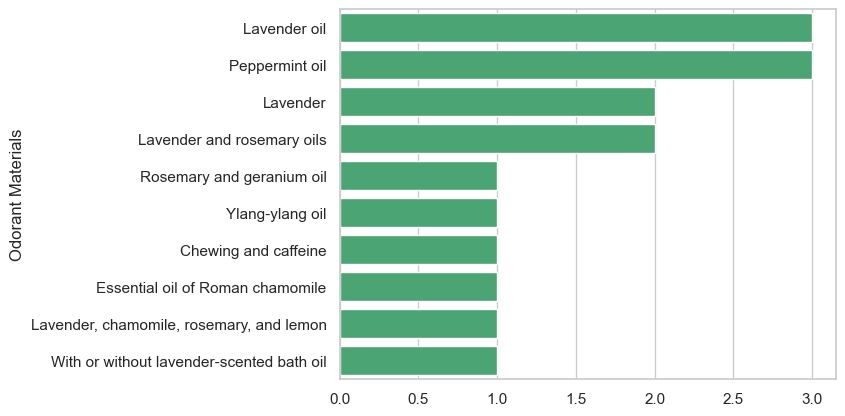

In [13]:
sns.barplot(x=top_odors.values, y=top_odors.index, color="mediumseagreen")


In [14]:
# -------------------------------------------------------------
#  Инсайты и выводы
# -------------------------------------------------------------
#
# 1. Большинство ароматов в датасете относятся к категории Floral и Other.
# 2. Основные психофизиологические эффекты — Relaxing и Other, Mood Boost встречается реже.
# 3. Расширенная классификация позволила увидеть, что конкретные ароматы, например:
#    - Lavender → Relaxing
#    - Peppermint → Stimulating
#    - Rose → Mood Boost / Relaxing
# 4. Heatmap показал, что определённые типы ароматов чаще вызывают конкретные эффекты.
# 5. Топ 10 ароматов демонстрируют разнообразие эффектов — это важно для маркетинга и парфюмерии.
# 6. Круговые диаграммы показывают долю каждого типа аромата и эффекта, наглядно демонстрируя распределение.
# 7. Горизонтальные гистограммы позволяют быстро оценить, какие эффекты и ароматы встречаются чаще всего.
# 8. Визуализации помогают делать рекомендации: какие ароматы использовать для расслабления, бодрости или улучшения настроения.
# 9. Датасет маленький, поэтому выводы скорее иллюстративные, но подход применим к большим данным.
# 10. В дальнейшем можно расширить анализ, добавив больше ключевых слов, тонкие категории ароматов и количественные оценки эффектов.
#
# -------------------------------------------------------------
